In [1]:
import copy
import datetime as dt
import importlib # needed so that we can reload packages
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import pandas as pd
import pathlib
import sys
import time
from typing import Union
import warnings
warnings.filterwarnings("ignore")

In [2]:
##  IMPORT SISEPUEDE EXAMPLES AND TRANSFORMERS

from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
from sisepuede.manager.sisepuede_file_structure import SISEPUEDEFileStructure
import sisepuede.core.support_classes as sc
import sisepuede.transformers as trf
import sisepuede.utilities._plotting as spu
import sisepuede.utilities._toolbox as sf


# Use os.getcwd() instead of os.path.dirname(__file__) in a Jupyter notebook
sys.path.append(os.path.join('../', 'utils'))

from TransformationUtils import ExcelYAMLHandler
from TransformationUtils import StrategyCSVHandler


In [3]:
##  SETUP DIRECTORIES

dir_cur = pathlib.Path(os.getcwd())
dir_data = dir_cur.joinpath("data")
dir_transformations = dir_cur.joinpath("transformations")


##  SETUP FILES

fp_data_base = dir_data.joinpath("sisepuede_inputs_georgia.csv")


##  SETUP SOME SISEPUEDE STUFF

file_struct = SISEPUEDEFileStructure()

matt = file_struct.model_attributes
regions = sc.Regions(matt)
time_periods = sc.TimePeriods(matt)

In [4]:
##  BUILD BASE INPUTS

df_inputs_raw = pd.read_csv(fp_data_base)

# pull example data to fill in gaps
examples = SISEPUEDEExamples()
df_inputs_example = examples.input_data_frame

In [5]:
df_inputs_raw.head()

,region,iso_code3,period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,georgia,GEO,0,6970000,70,2923,31.751466,6468,315,508,...,14.251229,27.557750,0.921311,0.813395,0,3.30693,3.306930,39.202663,16.072745,15.929195
1,georgia,GEO,1,6970000,70,2923,31.751466,6468,315,508,...,12.808034,27.557750,0.918334,0.816150,0,3.30693,3.306930,47.312358,15.460559,15.108558
2,georgia,GEO,2,6970000,70,2923,31.751466,6468,315,508,...,12.624132,27.610771,0.916130,0.821111,0,3.30693,3.307371,50.557338,15.350089,15.005724
3,georgia,GEO,3,6970000,70,2923,31.751466,6468,315,508,...,13.037755,33.069300,0.918555,0.816922,0,3.30693,3.790844,52.388716,16.958543,14.721163
4,georgia,GEO,4,6970000,70,2923,31.751466,6468,315,508,...,10.743510,27.557750,0.917673,0.818024,0,3.30693,4.158464,50.068133,13.796953,13.766562


In [6]:
df_inputs_example.head()

,region,time_period,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,avgmass_lvst_animal_chickens_kg,...,ef_ippu_tonne_cf4_per_tonne_production_electronics,ef_ippu_tonne_cf4_per_tonne_production_metals,ef_ippu_tonne_c3f8_per_tonne_production_chemicals,ef_ippu_tonne_c3f8_per_tonne_production_electronics,ef_ippu_tonne_c4f10_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c4f10_per_tonne_production_chemicals,ef_ippu_tonne_c6f14_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c6f14_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_electronics
0,costa_rica,0,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,4.204879e-07,0.0,1.515048e-07,0.0,0.0,0.0,0.0,0.0,5.669821e-08
1,costa_rica,1,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.134675e-07,0.0,1.313925e-07,0.0,0.0,0.0,0.0,0.0,5.185820e-08
2,costa_rica,2,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,1.821067e-07,0.0,1.060066e-07,0.0,0.0,0.0,0.0,0.0,5.269348e-08
3,costa_rica,3,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.094712e-07,0.0,1.093024e-07,0.0,0.0,0.0,0.0,0.0,5.500450e-08
4,costa_rica,4,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.446161e-07,0.0,1.046451e-07,0.0,0.0,0.0,0.0,0.0,5.266081e-08


In [7]:
def compare_dfs(df1, df2):
    # Assuming your DataFrames are df1 and df2
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)

    # Columns present in df1 but not in df2
    diff_in_df1 = columns_df1 - columns_df2

    # Columns present in df2 but not in df1
    diff_in_df2 = columns_df2 - columns_df1

    print("Columns in df1 but not in df2:", diff_in_df1)
    print("Columns in df2 but not in df1:", diff_in_df2)

def add_missing_cols(df1, df2):
    # Identify columns in df1 but not in df2
    columns_to_add = [col for col in df1.columns if col not in df2.columns]

    # Add missing columns to df2 with their values from df1
    for col in columns_to_add:
        df2[col] = df1[col]
    
    return df2


In [8]:
compare_dfs(df_inputs_example, df_inputs_raw)


Columns in df1 but not in df2: {'ef_enfu_combustion_tonne_co2_per_tj_fuel_biofuels', 'ef_soil_ef1_n_synthetic_fertilizer_n2o_dry_climate', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_natural_gas', 'ratio_agrc_above_ground_residue_to_yield_rice', 'ef_enfu_stationary_combustion_tonne_ch4_per_tj_fuel_coal_deposits', 'ef_enfu_stationary_combustion_tonne_n2o_per_tj_fuel_natural_gas_unprocessed', 'qty_soil_organic_c_stock_wet_climate_tonne_per_ha', 'energydensity_gravimetric_enfu_gj_per_tonne_fuel_water', 'regressionm_agrc_above_ground_residue_other_annual_kg_per_ha', 'nemomod_entc_emissions_activity_ratio_fuel_production_fp_natural_gas_tonne_co2_per_tj', 'nemomod_entc_emissions_activity_ratio_fuel_production_fp_natural_gas_tonne_n2o_per_tj', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_electricity', 'frac_agrc_n_in_below_ground_residue_cereals', 'ef_enfu_stationary_combustion_tonne_n2o_per_tj_fuel_water', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_wind', 'frac_agrc_n_in_below_ground_residue_other

In [9]:
df_inputs_raw = df_inputs_raw.rename(columns={'period':'time_period'})
df_inputs_raw_complete = add_missing_cols(df_inputs_example, df_inputs_raw.copy())
df_inputs_raw_complete = df_inputs_raw_complete.drop(columns='iso_code3')
df_inputs_raw_complete.head()

,region,time_period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_electrolysis_water,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_electricity,energydensity_gravimetric_enfu_gj_per_tonne_fuel_ammonia,energydensity_gravimetric_enfu_gj_per_tonne_fuel_water,frac_trns_fuelmix_water_borne_ammonia,nemomod_entc_output_activity_ratio_fuel_production_fp_ammonia_production_ammonia,nemomod_entc_output_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_hydrogen,nemomod_entc_frac_min_share_production_fp_hydrogen_reformation_ccs,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_natural_gas,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_oil
0,georgia,0,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
1,georgia,1,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
2,georgia,2,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
3,georgia,3,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
4,georgia,4,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0


In [10]:
compare_dfs(df_inputs_example, df_inputs_raw_complete)

Columns in df1 but not in df2: set()
Columns in df2 but not in df1: set()


In [11]:
# Get a list of columns with NaN values
# Get a list of columns with NaN values
columns_with_na = df_inputs_raw_complete.columns[df_inputs_raw_complete.isna().any()].tolist()

print(columns_with_na)


[]


In [12]:
simulation = 0.11618306654485
edgar_value = 0.0074053450

# factor
factor = edgar_value / simulation
factor

0.06373859134748629

In [13]:
vars = [
'ef_fgtv_distribution_tonne_co2_per_m3_fuel_natural_gas',
'ef_fgtv_production_flaring_tonne_co2_per_m3_fuel_coal',
'ef_fgtv_production_flaring_tonne_co2_per_m3_fuel_natural_gas',
'ef_fgtv_production_flaring_tonne_co2_per_m3_fuel_oil',
'ef_fgtv_production_fugitive_tonne_co2_per_m3_fuel_coal',
'ef_fgtv_production_fugitive_tonne_co2_per_m3_fuel_natural_gas',
'ef_fgtv_production_fugitive_tonne_co2_per_m3_fuel_oil',
'ef_fgtv_production_venting_tonne_co2_per_m3_fuel_coal',
'ef_fgtv_production_venting_tonne_co2_per_m3_fuel_oil',
'ef_fgtv_transmission_tonne_co2_per_m3_fuel_natural_gas',
'ef_fgtv_transmission_tonne_co2_per_m3_fuel_oil']

In [14]:
df_inputs_raw_complete[vars] = df_inputs_raw_complete[vars] * factor


In [15]:
# fgtv_sector ch4
simulation = 0.98411017786700
edgar_value = 0.0935904790

# factor
factor = edgar_value / simulation
factor

vars = [
"ef_fgtv_distribution_tonne_ch4_per_m3_fuel_natural_gas",       
"ef_fgtv_production_flaring_tonne_ch4_per_m3_fuel_coal",
"ef_fgtv_production_flaring_tonne_ch4_per_m3_fuel_natural_gas",
"ef_fgtv_production_flaring_tonne_ch4_per_m3_fuel_oil",
"ef_fgtv_production_fugitive_tonne_ch4_per_m3_fuel_coal",
"ef_fgtv_production_fugitive_tonne_ch4_per_m3_fuel_natural_gas",
"ef_fgtv_production_fugitive_tonne_ch4_per_m3_fuel_oil",
"ef_fgtv_production_venting_tonne_ch4_per_m3_fuel_coal",
"ef_fgtv_production_venting_tonne_ch4_per_m3_fuel_oil",
"ef_fgtv_transmission_tonne_ch4_per_m3_fuel_natural_gas",
"ef_fgtv_transmission_tonne_ch4_per_m3_fuel_oil"]

df_inputs_raw_complete[vars] = df_inputs_raw_complete[vars] * factor

In [16]:
# frst_sector ch4

# factor
simulation = -0.98411017786700
edgar_value = -5.4843000000

factor = edgar_value / simulation
factor

vars = [
"ef_frst_forestfires_mangroves_co2",        
"ef_frst_forestfires_primary_co2",          
"ef_frst_forestfires_secondary_co2",        
"ef_frst_sequestration_mangroves_kt_co2_ha",
"ef_frst_sequestration_primary_kt_co2_ha",  
"ef_frst_sequestration_secondary_kt_co2_ha",]

df_inputs_raw_complete[vars] = df_inputs_raw_complete[vars] * factor

#  Let's try building transformations using this


In [17]:
transformers = trf.transformers.Transformers(
    {},
    df_input = df_inputs_raw_complete,
)


##  Instantiate some transformations CAREFUL NOT TO OVERWRITE EXISTING TRANSFORMATIONS!!

In [18]:
# set an ouput path and instantiate
if not dir_transformations.exists():
    trf.instantiate_default_strategy_directory(
        transformers,
        dir_transformations,
    )


##  --HERE, CUSTOMIZE YOUR TRANSFORMATIONS AND STRATEGIES--
- go to `dir_transformers` and edit config files and `strategy_definitions.csv`
- then, go to next cell

In [19]:
excel_yaml_handler = ExcelYAMLHandler(excel_file='data/ssp_georgia_transformation_cw.xlsx', yaml_directory='transformations')

In [20]:
excel_yaml_handler.process_yaml_files()

YAML file transformation_agrc_inc_conservation_agriculture.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_inen_shift_fuel_heat.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_lsmm_inc_management_cattle_pigs.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_lsmm_inc_management_other.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_lsmm_inc_management_poultry.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_lvst_dec_enteric_fermentation.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_pflo_inc_ind_ccs.yaml for strategy strategy_net_zero set to default because it

In [21]:
csv_handler = StrategyCSVHandler('transformations/strategy_definitions.csv', 'transformations', '../utils/strategy_mapping.yaml')
csv_handler.add_row('PFLO', 'NDC Unconditional', 'strategy_NDC_Uncon')
csv_handler.add_row('PFLO', 'NDC 2 deg. Scenario', 'strategy_NDC_2_scenario')
csv_handler.add_row('PFLO', 'NDC 1.5 deg. Scenario', 'strategy_NDC_1_scenario')
csv_handler.add_row('PFLO', 'Net Zero', 'net_zero')
csv_handler.save_csv()

Added new row: {'strategy_id': 6003, 'strategy_code': 'PFLO:STRATEGY_NDC_UNCON', 'strategy': 'strategy_NDC_Uncon', 'description': 'NDC Unconditional', 'transformation_specification': 'TX:TRNS:SHIFT_FUEL_MARITIME_STRATEGY_NDC_UNCON|TX:TRNS:INC_OCCUPANCY_LIGHT_DUTY_STRATEGY_NDC_UNCON|TX:WASO:INC_CAPTURE_BIOGAS_STRATEGY_NDC_UNCON|TX:TRNS:SHIFT_FUEL_MEDIUM_DUTY_STRATEGY_NDC_UNCON|TX:TRNS:SHIFT_MODE_PASSENGER_STRATEGY_NDC_UNCON|TX:INEN:INC_EFFICIENCY_PRODUCTION_STRATEGY_NDC_UNCON|TX:TRNS:SHIFT_MODE_FREIGHT_STRATEGY_NDC_UNCON|TX:LNDU:DEC_DEFORESTATION_STRATEGY_NDC_UNCON|TX:AGRC:DEC_CH4_RICE_STRATEGY_NDC_UNCON|TX:TRNS:INC_EFFICIENCY_ELECTRIC_STRATEGY_NDC_UNCON|TX:TRNS:SHIFT_MODE_REGIONAL_STRATEGY_NDC_UNCON|TX:AGRC:INC_PRODUCTIVITY_STRATEGY_NDC_UNCON|TX:WASO:INC_RECYCLING_STRATEGY_NDC_UNCON|TX:WASO:INC_ENERGY_FROM_INCINERATION_STRATEGY_NDC_UNCON|TX:ENTC:TARGET_RENEWABLE_ELEC_STRATEGY_NDC_UNCON|TX:WASO:INC_ENERGY_FROM_BIOGAS_STRATEGY_NDC_UNCON|TX:ENTC:DEC_LOSSES_STRATEGY_NDC_UNCON|TX:WASO:INC_A

In [22]:
# import yaml

# # Path to the YAML file
# file_path = dir_transformations.joinpath("transformation_pflo_inc_ind_ccs_strategy_net_zero.yaml")

# # Read the YAML file
# with open(file_path, 'r') as file:
#     config = yaml.safe_load(file)

# # Update the value of 'dict_magnitude_eff'
# config['parameters']['dict_magnitude_eff'] = 0.05
# config['parameters']['dict_magnitude_prev'] = {
#     'cement': 0.5,
#     'chemicals': 0.5,
#     'metals': 0.5,
#     'plastics': 0.5
# }

# # Save the changes back to the YAML file
# with open(file_path, 'w') as file:
#     yaml.safe_dump(config, file)

# print(f"File updated successfully")


In [23]:
# then, you can load this back in after modifying (play around with it)
transformations = trf.Transformations(
    dir_transformations,
    transformers = transformers,
)
tab = transformations.attribute_transformation.table

In [24]:
#  build the strategies -- will export to path
t0 = time.time()
strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
    prebuild = True,
)

t_elapse = sf.get_time_elapsed(t0)
print(f"Strategies defined at {strategies.transformations.dir_init} initialized in {t_elapse} seconds")

Strategies defined at /home/fabian_fuentes/repos/sisepuede_region_nbs/georgia/transformations initialized in 2.47 seconds


In [25]:
strategies.attribute_table

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
68,6002,PFLO:ALL,All Actions,All actions (unique by transformer),TX:AGRC:DEC_CH4_RICE|TX:AGRC:DEC_EXPORTS|TX:AG...,0
69,6003,PFLO:STRATEGY_NDC_UNCON,strategy_NDC_Uncon,NDC Unconditional,TX:TRNS:SHIFT_FUEL_MARITIME_STRATEGY_NDC_UNCON...,0
70,6004,PFLO:STRATEGY_NDC_2_SCENARIO,strategy_NDC_2_scenario,NDC 2 deg. Scenario,TX:AGRC:INC_PRODUCTIVITY_STRATEGY_NDC_2_SCENAR...,0
71,6005,PFLO:STRATEGY_NDC_1_SCENARIO,strategy_NDC_1_scenario,NDC 1.5 deg. Scenario,TX:ENTC:TARGET_RENEWABLE_ELEC_STRATEGY_NDC_1_S...,0


##  Build our templates
- let's use the default variable groupings for LHS

In [26]:
df_vargroups = examples("variable_trajectory_group_specification")

strategies.build_strategies_to_templates(
    df_trajgroup = df_vargroups,
    include_simplex_group_as_trajgroup = True,
    strategies = [0, 6003, 6004, 6005, 6006],
)

0

# Finally, load SISEPUEDE so that we can run it

In [27]:
import sisepuede as si

ssp = si.SISEPUEDE(
    "calibrated",
    db_type = "csv",
    #id_str = "sisepuede_run_2024-11-06",
    initialize_as_dummy = False, # no connection to Julia is initialized if set to True
    regions = ["georgia"],
    strategies = strategies,
    try_exogenous_xl_types_in_variable_specification = True,
)

2024-12-05 16:23:32,171 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-12-05 16:23:32,173 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-12-05 16:23:32,174 - INFO - 	Setting export engine to 'csv'.
2024-12-05 16:23:32,175 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-12-05 16:23:32,175 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-12-05 16:23:32,176 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2024-12-05 16:23:32,176 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2024-12-05 16:23:32,176 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2024-12-05 16:23:32,177 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2024-12-05 16:23:32,177 - WARNING - No index fi

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   1748.6 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.
2024-12-05 16:24:12,046 - INFO - Successfully initialized JuMP optimizer from solver module HiGHS.
2024-12-05 16:24:12,065 - INFO - Successfully initialized SISEPUEDEModels.
2024-12-05 16:24:12,073 - INFO - Table ANALYSIS_METADATA successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/

In [28]:
dict_scens = {
    ssp.key_design: [0],
    ssp.key_future: [0],
    ssp.key_strategy: [0, 6003, 6004, 6005, 6006],
}

ssp.project_scenarios(
    dict_scens,
    save_inputs = True,
)

2024-12-05 16:24:12,271 - INFO - 
***	STARTING REGION georgia	***

2024-12-05 16:24:15,476 - INFO - Trying run primary_id = 0 in region georgia
2024-12-05 16:24:15,477 - INFO - Running AFOLU model
2024-12-05 16:24:15,605 - INFO - AFOLU model run successfully completed
2024-12-05 16:24:15,606 - INFO - Running CircularEconomy model
2024-12-05 16:24:15,646 - INFO - CircularEconomy model run successfully completed
2024-12-05 16:24:15,647 - INFO - Running IPPU model
2024-12-05 16:24:15,709 - INFO - IPPU model run successfully completed
2024-12-05 16:24:15,710 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-12-05 16:24:15,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2024-12-05 16:24:15,800 - INFO - EnergyConsumption without Fugitive Emissions model run successfully completed
2024-12-05 16:24:15,801 - INFO - Running Energy model (Electricity and Fuel Production: trying

2024-05-Dec 16:24:16.365 Opened SQLite database at /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-05-Dec 16:24:16.614 Added NEMO structure to SQLite database at /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-05-Dec 16:24:27.756 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-12-05 16:26:15,742 - INFO - NemoMod ran successfully with the following status: OPTIMAL


2024-05-Dec 16:26:15.566 Finished modeling scenario.


2024-12-05 16:26:15,806 - INFO - EnergyProduction model run successfully completed
2024-12-05 16:26:15,806 - INFO - Running Energy (Fugitive Emissions)
2024-12-05 16:26:15,851 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-12-05 16:26:15,851 - INFO - Appending Socioeconomic outputs
2024-12-05 16:26:15,866 - INFO - Socioeconomic outputs successfully appended.
2024-12-05 16:26:15,870 - INFO - Model run for primary_id = 0 successfully completed in 120.39 seconds (n_tries = 1).
2024-12-05 16:26:15,897 - INFO - Trying run primary_id = 69069 in region georgia
2024-12-05 16:26:15,898 - INFO - Running AFOLU model
2024-12-05 16:26:16,031 - INFO - AFOLU model run successfully completed
2024-12-05 16:26:16,032 - INFO - Running CircularEconomy model
2024-12-05 16:26:16,078 - INFO - CircularEconomy model run successfully completed
2024-12-05 16:26:16,079 - INFO - Running IPPU model
2024-12-05 16:26:16,144 - INFO - IPPU model run successfully completed
2024-12-05 16:26

2024-05-Dec 16:26:17.358 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-12-05 16:27:37,473 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-12-05 16:27:37,488 - INFO - EnergyProduction model run successfully completed
2024-12-05 16:27:37,489 - INFO - Running Energy (Fugitive Emissions)
2024-12-05 16:27:37,534 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-12-05 16:27:37,534 - INFO - Appending Socioeconomic outputs


2024-05-Dec 16:27:37.342 Finished modeling scenario.


2024-12-05 16:27:37,549 - INFO - Socioeconomic outputs successfully appended.
2024-12-05 16:27:37,552 - INFO - Model run for primary_id = 69069 successfully completed in 81.65 seconds (n_tries = 1).
2024-12-05 16:27:37,557 - INFO - Trying run primary_id = 70070 in region georgia
2024-12-05 16:27:37,557 - INFO - Running AFOLU model
2024-12-05 16:27:37,690 - INFO - AFOLU model run successfully completed
2024-12-05 16:27:37,691 - INFO - Running CircularEconomy model
2024-12-05 16:27:37,732 - INFO - CircularEconomy model run successfully completed
2024-12-05 16:27:37,733 - INFO - Running IPPU model
2024-12-05 16:27:37,800 - INFO - IPPU model run successfully completed
2024-12-05 16:27:37,801 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-12-05 16:27:37,823 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2024-12-05 16:27:37,889 - INFO - EnergyConsumption without Fugitive E

2024-05-Dec 16:27:39.990 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-12-05 16:28:40,500 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-12-05 16:28:40,513 - INFO - EnergyProduction model run successfully completed
2024-12-05 16:28:40,514 - INFO - Running Energy (Fugitive Emissions)
2024-12-05 16:28:40,553 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-12-05 16:28:40,553 - INFO - Appending Socioeconomic outputs
2024-12-05 16:28:40,567 - INFO - Socioeconomic outputs successfully appended.
2024-12-05 16:28:40,571 - INFO - Model run for primary_id = 70070 successfully completed in 63.01 seconds (n_tries = 1).


2024-05-Dec 16:28:40.368 Finished modeling scenario.


2024-12-05 16:28:40,576 - INFO - Trying run primary_id = 71071 in region georgia
2024-12-05 16:28:40,577 - INFO - Running AFOLU model
2024-12-05 16:28:40,702 - INFO - AFOLU model run successfully completed
2024-12-05 16:28:40,703 - INFO - Running CircularEconomy model
2024-12-05 16:28:40,746 - INFO - CircularEconomy model run successfully completed
2024-12-05 16:28:40,747 - INFO - Running IPPU model
2024-12-05 16:28:40,815 - INFO - IPPU model run successfully completed
2024-12-05 16:28:40,816 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-12-05 16:28:40,837 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2024-12-05 16:28:40,905 - INFO - EnergyConsumption without Fugitive Emissions model run successfully completed
2024-12-05 16:28:40,905 - INFO - Running Energy model (Electricity and Fuel Production: trying to call Julia)


2024-05-Dec 16:28:42.541 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-12-05 16:29:57,018 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-12-05 16:29:57,030 - INFO - EnergyProduction model run successfully completed
2024-12-05 16:29:57,031 - INFO - Running Energy (Fugitive Emissions)
2024-12-05 16:29:57,072 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-12-05 16:29:57,073 - INFO - Appending Socioeconomic outputs
2024-12-05 16:29:57,089 - INFO - Socioeconomic outputs successfully appended.


2024-05-Dec 16:29:56.888 Finished modeling scenario.


2024-12-05 16:29:57,093 - INFO - Model run for primary_id = 71071 successfully completed in 76.52 seconds (n_tries = 1).
2024-12-05 16:29:57,098 - INFO - Trying run primary_id = 72072 in region georgia
2024-12-05 16:29:57,098 - INFO - Running AFOLU model
2024-12-05 16:29:57,230 - INFO - AFOLU model run successfully completed
2024-12-05 16:29:57,230 - INFO - Running CircularEconomy model
2024-12-05 16:29:57,274 - INFO - CircularEconomy model run successfully completed
2024-12-05 16:29:57,275 - INFO - Running IPPU model
2024-12-05 16:29:57,340 - INFO - IPPU model run successfully completed
2024-12-05 16:29:57,341 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-12-05 16:29:57,363 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2024-12-05 16:29:57,432 - INFO - EnergyConsumption without Fugitive Emissions model run successfully completed
2024-12-05 16:29:57,432 - INFO - Run

2024-05-Dec 16:29:59.071 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-12-05 16:31:08,578 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-12-05 16:31:08,589 - INFO - EnergyProduction model run successfully completed
2024-12-05 16:31:08,589 - INFO - Running Energy (Fugitive Emissions)
2024-12-05 16:31:08,626 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-12-05 16:31:08,626 - INFO - Appending Socioeconomic outputs
2024-12-05 16:31:08,641 - INFO - Socioeconomic outputs successfully appended.
2024-12-05 16:31:08,644 - INFO - Model run for primary_id = 72072 successfully completed in 71.55 seconds (n_tries = 1).
2024-12-05 16:31:08,646 - INFO - 
***	 REGION georgia COMPLETE	***



2024-05-Dec 16:31:08.452 Finished modeling scenario.


2024-12-05 16:31:08,776 - INFO - Table MODEL_OUTPUT successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-12-05T16;23;31.776834/sisepuede_run_2024-12-05T16;23;31.776834_output_database/MODEL_OUTPUT.csv.
2024-12-05 16:31:08,779 - INFO - Table ATTRIBUTE_PRIMARY successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-12-05T16;23;31.776834/sisepuede_run_2024-12-05T16;23;31.776834_output_database/ATTRIBUTE_PRIMARY.csv.
2024-12-05 16:31:08,910 - INFO - Table MODEL_INPUT successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2024-12-05T16;23;31.776834/sisepuede_run_2024-12-05T16;23;31.776834_output_database/MODEL_INPUT.csv.


{'georgia': [0, 69069, 70070, 71071, 72072]}

In [29]:
df_run = ssp.generate_scenario_database_from_primary_key(0)
df_run = df_run.get("georgia")
df_run.to_csv("/home/fabian_fuentes/repos/sisepuede_region_nbs/georgia/output/georgia_baselines_temp.csv", encoding = "UTF-8", index = None, )

In [30]:
df_out = ssp.read_output(None)

In [31]:
df_in = ssp.read_input(None)

In [32]:
df_out.primary_id.unique()

array([    0, 69069, 70070, 71071, 72072])

# option to pass `df_out` back to data_modifications
- do this if the outputs are needed to rescale input demand values to match IEA data

In [33]:
(
    df_out
    .to_csv(
        dir_data.joinpath("sisepuede_outputs_georgia.csv"),
        index = None,
        encoding = "UTF-8",
    )
)

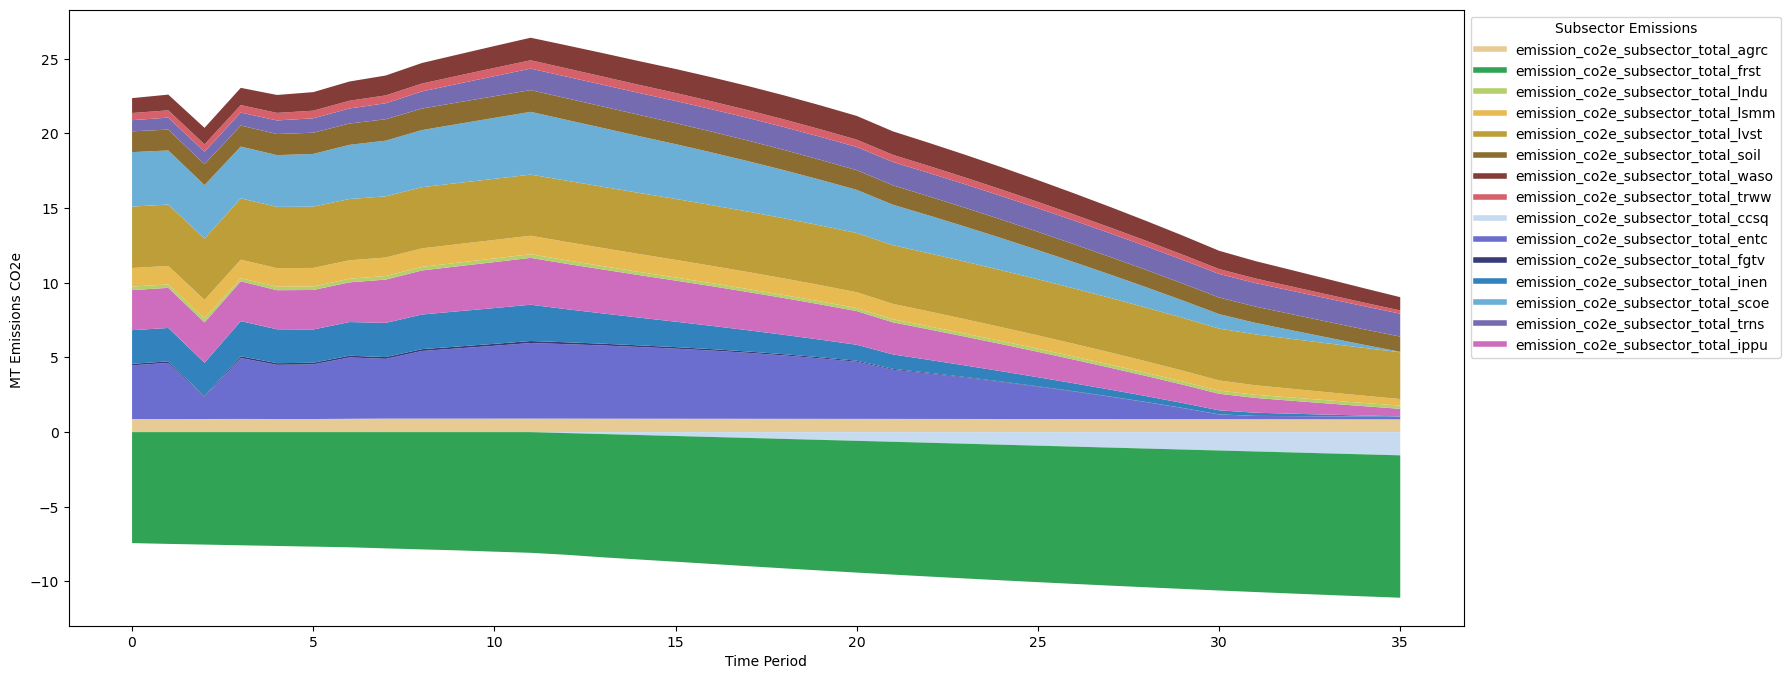

In [34]:
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_xlabel("Time Period")
ax.set_ylabel("MT Emissions CO2e ")

df_plot = df_out[df_out[ssp.key_primary].isin([72072])]

fields = matt.get_all_subsector_emission_total_fields()
dict_format = dict((k, {"color": v}) for (k, v) in matt.get_subsector_color_map().items())

fig, ax = spu.plot_stack(
    df_plot,
    fields,
    dict_formatting=dict_format,
    field_x="time_period",
    figtuple=(fig, ax),
)

handles = [plt.Line2D([0], [0], color=formatting["color"], lw=4) for formatting in dict_format.values()]
labels = list(dict_format.keys())

ax.legend(handles, labels, title="Subsector Emissions", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()


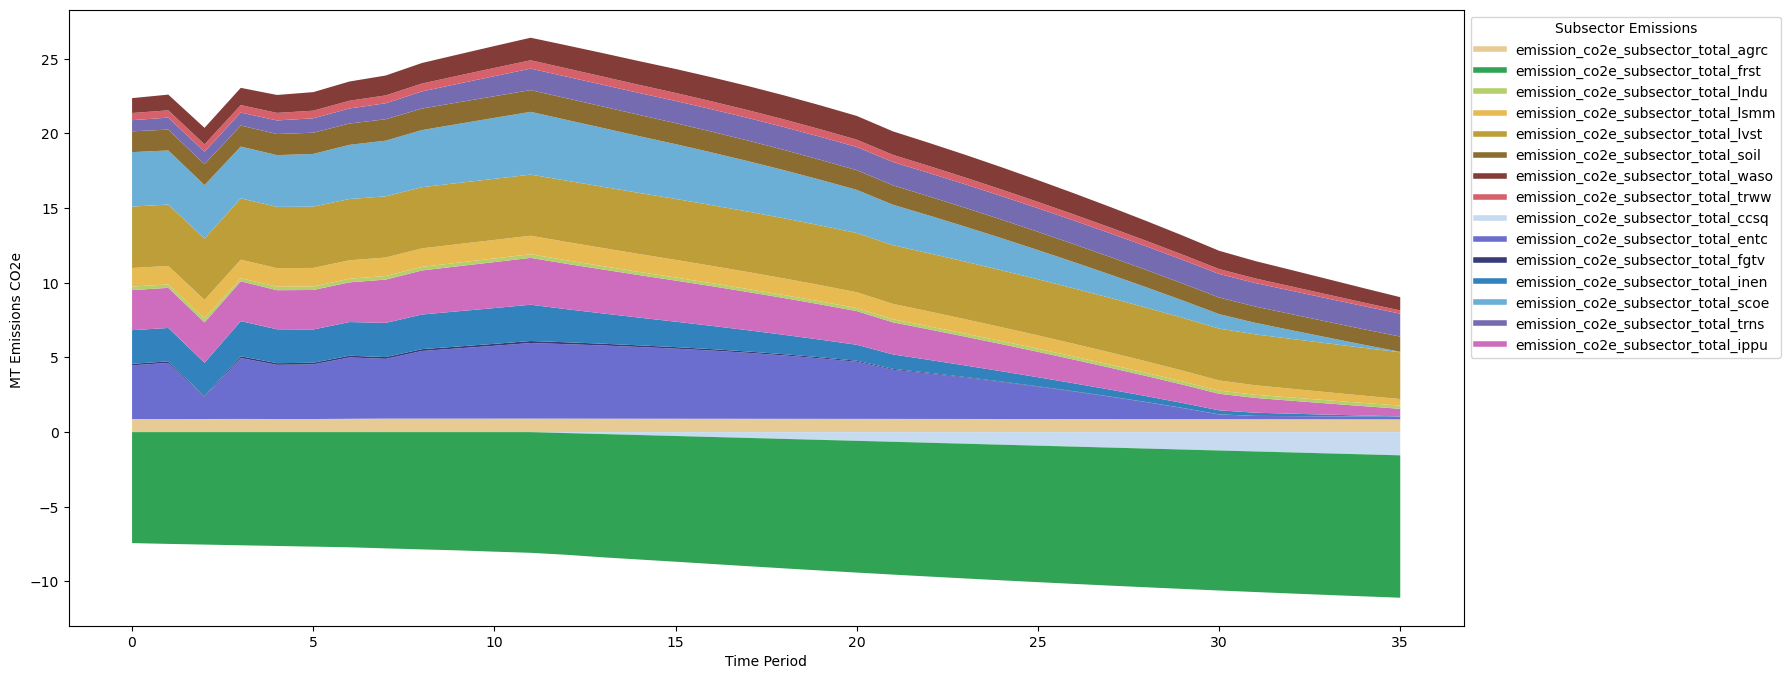

In [35]:
# Configuración del gráfico
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_xlabel("Time Period")
ax.set_ylabel("MT Emissions CO2e ")

df_plot = df_out[df_out[ssp.key_primary].isin([72072])]

fields = matt.get_all_subsector_emission_total_fields()
dict_format = dict((k, {"color": v}) for (k, v) in matt.get_subsector_color_map().items())

fig, ax = spu.plot_stack(
    df_plot,
    fields,
    dict_formatting=dict_format,
    field_x="time_period",
    figtuple=(fig, ax),
)

handles = [plt.Line2D([0], [0], color=formatting["color"], lw=4) for formatting in dict_format.values()]
labels = list(dict_format.keys())

ax.legend(handles, labels, title="Subsector Emissions", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()


In [36]:
strategys = df_out.primary_id.unique()
strategys

array([    0, 69069, 70070, 71071, 72072])

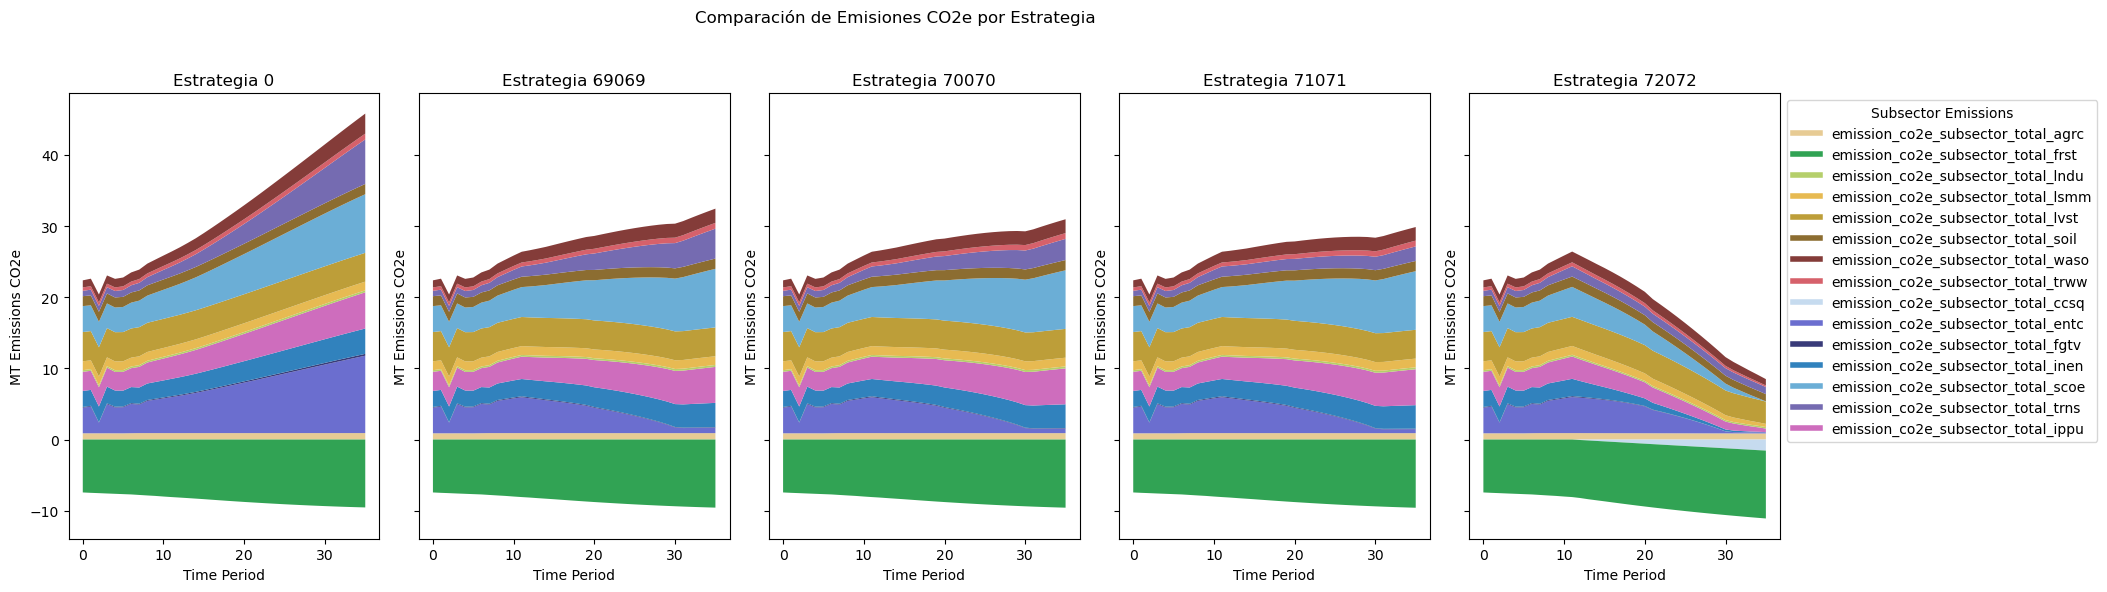

In [139]:
# Configuración del gráfico con tres subplots (uno para cada estrategia)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 6), sharey=True)
fig.suptitle("Comparación de Emisiones CO2e por Estrategia")

# Iterar sobre cada estrategia y su respectivo eje
for ax, strategy in zip(axes, strategys):
    # Filtrar el DataFrame para la estrategia actual
    df_plot = df_out[df_out[ssp.key_primary].isin([strategy])]
    
    # Obtener los campos y el formato de color para cada subsector
    fields = matt.get_all_subsector_emission_total_fields()
    dict_format = dict((k, {"color": v}) for (k, v) in matt.get_subsector_color_map().items())
    
    # Graficar con el stackplot para la estrategia actual en su propio eje
    spu.plot_stack(
        df_plot,
        fields,
        dict_formatting=dict_format,
        field_x="time_period",
        figtuple=(fig, ax),
    )
    
    # Configurar etiquetas y título del subplot
    ax.set_title(f"Estrategia {strategy}")
    ax.set_xlabel("Time Period")
    ax.set_ylabel("MT Emissions CO2e")

# Mostrar el gráfico completo
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta para que el título principal no se superponga

handles = [plt.Line2D([0], [0], color=formatting["color"], lw=4) for formatting in dict_format.values()]
labels = list(dict_format.keys())

ax.legend(handles, labels, title="Subsector Emissions", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()



# Export Wide File

In [129]:
df_out = ssp.read_output(None)
df_in = ssp.read_input(None)

In [130]:
df_out.head()

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,0,georgia,0,68043.892566,151354.043079,31404.873492,81856.221185,105627.965703,57648.297868,76258.593271,...,1.166552e+06,2.910869e+06,53111.993547,62028.324081,0.0,115873.824581,80053.907854,1.846732e+06,486067.626197,289499.051145
1,0,georgia,1,68038.488033,151342.021458,31402.379092,81849.719578,105619.575974,57643.719028,76252.536268,...,1.048334e+06,2.910638e+06,52936.213643,62233.532181,1108.0,115864.621052,80047.549399,2.228581e+06,467516.919002,274562.894120
2,0,georgia,2,68086.083016,151447.889786,31424.346007,81906.975936,105693.460067,57684.042555,76305.877226,...,1.034004e+06,2.918278e+06,52846.072734,62655.573713,1108.0,115945.671864,80114.225557,2.383097e+06,464501.090903,272884.874166
3,0,georgia,3,68101.985288,151483.262148,31431.685518,81926.106234,105718.145966,57697.515314,76323.699324,...,1.068133e+06,3.496025e+06,52998.336736,62350.504596,1108.0,115972.752283,91846.810698,2.469998e+06,513293.540909,267772.543460
4,0,georgia,4,68085.153665,151445.822575,31423.917076,81905.857934,105692.017388,57683.255188,76304.835678,...,8.799564e+05,2.912634e+06,52934.370165,62419.206053,1108.0,115944.089247,100728.833012,2.360005e+06,417496.736540,250346.822286


In [131]:
df_in.head()

,primary_id,region,time_period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,georgia,0,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,14.251229,27.557750,0.921311,0.813395,0.0,3.30693,3.306930,39.202663,16.072745,15.929195
1,0,georgia,1,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,12.808034,27.557750,0.918334,0.816150,0.0,3.30693,3.306930,47.312358,15.460559,15.108558
2,0,georgia,2,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,12.624132,27.610771,0.916130,0.821111,0.0,3.30693,3.307371,50.557338,15.350089,15.005724
3,0,georgia,3,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,13.037755,33.069300,0.918555,0.816922,0.0,3.30693,3.790844,52.388716,16.958543,14.721163
4,0,georgia,4,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,10.743510,27.557750,0.917673,0.818024,0.0,3.30693,4.158464,50.068133,13.796953,13.766562


In [132]:
all_primaries = sorted(list(df_out[ssp.key_primary].unique()))
all_primaries

[0, 69069, 70070, 71071, 72072]

In [133]:
# build if unable to simply read the data frame
if df_in is None:
    df_in = []
     
    for region in ssp.regions:
        for primary in all_primaries: 
            df_in_filt = ssp.generate_scenario_database_from_primary_key(primary)
            df_in.append(df_in_filt.get(region))
    
    df_in = pd.concat(df_in, axis = 0).reset_index(drop = True)

df_in 


,primary_id,region,time_period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,georgia,0,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,14.251229,27.557750,0.921311,0.813395,0.0,3.306930,3.306930,39.202663,16.072745,15.929195
1,0,georgia,1,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,12.808034,27.557750,0.918334,0.816150,0.0,3.306930,3.306930,47.312358,15.460559,15.108558
2,0,georgia,2,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,12.624132,27.610771,0.916130,0.821111,0.0,3.306930,3.307371,50.557338,15.350089,15.005724
3,0,georgia,3,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,13.037755,33.069300,0.918555,0.816922,0.0,3.306930,3.790844,52.388716,16.958543,14.721163
4,0,georgia,4,6970000.0,70.0,2923.0,31.751466,6468.0,315.0,508.0,...,10.743510,27.557750,0.917673,0.818024,0.0,3.306930,4.158464,50.068133,13.796953,13.766562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,72072,georgia,31,6970000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,3.704000,0.000000,0.000000,1.626569,0.0,3.619527,0.000000,0.000000,48.558051,81.554892
176,72072,georgia,32,6970000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,3.730458,0.000000,0.000000,1.638187,0.0,3.645381,0.000000,0.000000,48.904894,82.137427
177,72072,georgia,33,6970000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,3.756915,0.000000,0.000000,1.649805,0.0,3.671234,0.000000,0.000000,49.251737,82.719962
178,72072,georgia,34,6970000.0,70.0,4082.0,31.751466,6468.0,315.0,508.0,...,3.783372,0.000000,0.000000,1.661424,0.0,3.697088,0.000000,0.000000,49.598580,83.302497


In [134]:
df_export = pd.merge(
    df_out,
    df_in,
    how = "left",
)
df_export

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,georgia,0,68043.892566,151354.043079,31404.873492,81856.221185,105627.965703,57648.297868,76258.593271,...,14.251229,27.557750,0.921311,0.813395,0.0,3.306930,3.306930,39.202663,16.072745,15.929195
1,0,georgia,1,68038.488033,151342.021458,31402.379092,81849.719578,105619.575974,57643.719028,76252.536268,...,12.808034,27.557750,0.918334,0.816150,0.0,3.306930,3.306930,47.312358,15.460559,15.108558
2,0,georgia,2,68086.083016,151447.889786,31424.346007,81906.975936,105693.460067,57684.042555,76305.877226,...,12.624132,27.610771,0.916130,0.821111,0.0,3.306930,3.307371,50.557338,15.350089,15.005724
3,0,georgia,3,68101.985288,151483.262148,31431.685518,81926.106234,105718.145966,57697.515314,76323.699324,...,13.037755,33.069300,0.918555,0.816922,0.0,3.306930,3.790844,52.388716,16.958543,14.721163
4,0,georgia,4,68085.153665,151445.822575,31423.917076,81905.857934,105692.017388,57683.255188,76304.835678,...,10.743510,27.557750,0.917673,0.818024,0.0,3.306930,4.158464,50.068133,13.796953,13.766562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,72072,georgia,31,67093.644250,149240.349710,30966.297346,80713.080583,104152.847324,56843.226379,75193.624806,...,3.704000,0.000000,0.000000,1.626569,0.0,3.619527,0.000000,0.000000,48.558051,81.554892
176,72072,georgia,32,67039.059179,149118.932917,30941.104236,80647.415209,104068.112166,56796.980693,75132.449870,...,3.730458,0.000000,0.000000,1.638187,0.0,3.645381,0.000000,0.000000,48.904894,82.137427
177,72072,georgia,33,66984.384966,148997.317841,30915.869984,80581.642598,103983.238628,56750.659485,75071.175031,...,3.756915,0.000000,0.000000,1.649805,0.0,3.671234,0.000000,0.000000,49.251737,82.719962
178,72072,georgia,34,66929.621511,148875.504259,30890.594544,80515.762630,103898.226555,56704.262669,75009.800177,...,3.783372,0.000000,0.000000,1.661424,0.0,3.697088,0.000000,0.000000,49.598580,83.302497


In [135]:
# check output directory 
dir_pkg = os.path.join(
    ssp.file_struct.dir_out, 
    f"sisepuede_summary_results_run_{ssp.id_fs_safe}"
)
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None
dir_pkg

'/home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_summary_results_run_sisepuede_run_2024-12-05T13;04;23.842816'

In [136]:
for tab in ["ATTRIBUTE_STRATEGY"]:
    ssp.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


In [137]:
df_primary = (
    ssp
    .odpt_primary
    .get_indexing_dataframe(
        sorted(list(df_out[ssp.key_primary].unique()))
    )
)
    
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)

df_export.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{ssp.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)

In [138]:
ssp.file_struct.dir_out

'/home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out'